### Support Vector Machine digit classification

#### Import the labraries

In [1]:
## Import datasets, SVM classifier and performance metrics
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score,classification_report
import numpy as np
from sklearn import svm
import matplotlib.pyplot as plt
import random
import math
from sklearn.metrics import f1_score

#### Understanding the data

In [2]:
mnist = fetch_openml('mnist_784')

c:\Documents\Sussex_Files\Semester_1\Artificial_Life\Final_Project\Codes\ALifeProject\Lib\site-packages\sklearn\datasets\_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [4]:
mnist.data

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
mnist.target.shape

(70000,)

In [6]:
mnist.target

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

#### Using matplotlib to visualizing the handwrittem digits
The mnist.data contains all the data in a 1-D array. We have to transform the data frame into a NumPy array and then reshape it into 28x28.

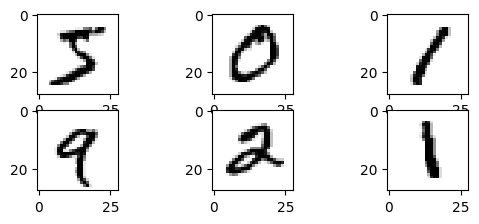

In [7]:
image= mnist.data.to_numpy()

plt.subplot(431)
plt.imshow((image[0].reshape(28,28)), cmap=plt.cm.gray_r, 
            interpolation='nearest')

plt.subplot(432)
plt.imshow(image[1].reshape(28,28), cmap=plt.cm.gray_r, 
            interpolation='nearest')

plt.subplot(433)
plt.imshow(image[3].reshape(28,28), cmap=plt.cm.gray_r, 
            interpolation='nearest')

plt.subplot(434)
plt.imshow(image[4].reshape(28,28), cmap=plt.cm.gray_r, 
            interpolation='nearest')

plt.subplot(435)
plt.imshow(image[5].reshape(28,28), cmap=plt.cm.gray_r, 
            interpolation='nearest')

plt.subplot(436)
plt.imshow(image[6].reshape(28,28), cmap=plt.cm.gray_r, 
            interpolation='nearest')

#### Dividing the dataset into training data and test data

In [8]:
## np.random.permutation create an array of random numbers in the range 0 to 5000
index_number= np.random.permutation(5000)
## Use the index_numer variable to select the random positions in the dataset
x1, y1 = mnist.data.loc[index_number], mnist.target.loc[index_number]
## Reset the index, now the index are from 0 to 5000
x1.reset_index(drop = True,inplace = True)
y1.reset_index(drop = True,inplace = True)
## Assing some the first 4000 values to x and y train and the rest to x and y test
x_train , x_test = x1[:4000], x1[4000:]
y_train , y_test = y1[:4000], y1[4000:]

In [9]:
y_test

4000    6
4001    0
4002    5
4003    3
4004    1
       ..
4995    9
4996    4
4997    3
4998    6
4999    1
Name: class, Length: 1000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [10]:
print("printing the count of infinity values") 

count = np.isinf(x_train).values.sum() 
print("x_train contains " + str(count) + " infinite values") 

count2 = np.isinf(x_test).values.sum() 
print("x_test contains " + str(count2) + " infinite values") 

count3 = x_train.isnull().sum().sum()
print('Number of NaN values present in x_train: ' + str(count3))

count4 = x_test.isnull().sum().sum()
print('Number of NaN values present in x_test: ' + str(count4))

count5 = y_train.isnull().sum().sum()
print('Number of NaN values present in y_train: ' + str(count5))

count6 = y_train.isnull().sum().sum()
print('Number of NaN values present in y_test: ' + str(count6))

printing the count of infinity values
x_train contains 0 infinite values
x_test contains 0 infinite values
Number of NaN values present in x_train: 0
Number of NaN values present in x_test: 0
Number of NaN values present in y_train: 0
Number of NaN values present in y_test: 0


#### Implementing the SVM algorithm and calculating its accuracy
In this section the SVM classifier is created with default hyperparameters to test the model and measure its accuracy

In [11]:
svc = svm.SVC(kernel='poly', gamma='scale', class_weight='balanced', C=10, decision_function_shape='ovo')
svc.fit(x_train,y_train)
result=svc.predict(x_test)
print('Accuracy :',accuracy_score(y_test,result))
print(classification_report(y_test,result))

Accuracy : 0.941
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       101
           1       0.91      0.99      0.95       117
           2       0.98      0.89      0.93       102
           3       0.95      0.94      0.94        98
           4       0.92      0.96      0.94       115
           5       0.94      0.85      0.89        89
           6       0.94      1.00      0.97        87
           7       0.95      0.91      0.93       108
           8       0.94      0.94      0.94        78
           9       0.93      0.95      0.94       105

    accuracy                           0.94      1000
   macro avg       0.94      0.94      0.94      1000
weighted avg       0.94      0.94      0.94      1000



### Using simulated annealing

#### Create the genotype

In [12]:
## Precomputed not use because needs an square matrix to work and it is not given in this experiment
kernel = ['linear', 'poly', 'rbf', 'sigmoid']
C = np.arange(0.5, 15, 0.5)
degree = np.arange(1, 10, 1)
gamma = ['scale', 'auto']
coef0 = np.arange(0, 1, 0.05)

### Utilities

In [13]:
def create_random_hyperparameters_set(my_kernel, my_C, my_degree, my_gamma, my_coef0):
    """
        Create random hyperparameters set. Uses the pre defined hyperparameters to create randomly the first genotype
        :param kernel: List with the possible kernels
        :param C: possible C values
        :param degree: possible degree values
        :param gamma: list with the gamma possibilities. 'scalar' or 'auto'
        :param coef0: possible coef0 values

        :return: list with random values for the SVM algorithm
    """
    ## Create the output list
    hyper_params = [random.choice(my_kernel), random.choice(my_C), random.choice(my_degree), random.choice(my_gamma), round(random.choice(my_coef0), 2)]

    return hyper_params

random_hyper_params = create_random_hyperparameters_set(kernel, C, degree, gamma, coef0)
print(random_hyper_params)

def get_svm_fitness(my_kernel, my_C, my_degree, my_gamma, my_coef0):
    """
        Creates the SVM model, train and test the model to get the fitness
        :param my_kernel: Selected SVM kernel
        :param my_C: Selected C value
        :param my_degree: Selected degree value
        :param my_gamma: Selected gamma, between 'scale' and 'auto'
        :param my coef0: Selected coef0
        :return: SVC F1 Score
    """
    my_svc = svm.SVC(kernel=my_kernel, C=my_C, degree=my_degree, gamma=my_gamma, coef0=my_coef0)
    my_svc.fit(x_train,y_train)
    my_result=my_svc.predict(x_test)
    my_f1_score = f1_score(y_test, my_result, average='micro')
    if math.isinf(my_f1_score):
        my_f1_score = 0.99999999
        return my_f1_score
    # print('Accuracy :',accuracy_score(y_test,my_result))
    # print(classification_report(y_test,result))
    # print(f'F1 Score: {my_f1_score}')
    return my_f1_score



['poly', 14.0, 9, 'scale', 0.95]


### Test - Create initial hyperparameters - Initial solution

In [14]:
svc_fitness = get_svm_fitness(my_kernel = random_hyper_params[0], my_C = random_hyper_params[1], my_degree = random_hyper_params[2], my_gamma = random_hyper_params[3], my_coef0 = random_hyper_params[4])
svc_fitness

0.939

##### Some tests

In [15]:
## Current solution: ['poly', 43.0, 29, 'scale', 0.8]

svc_test = get_svm_fitness(my_kernel='poly', my_C=43.0, my_degree=29, my_gamma='scale', my_coef0=0.8)
svc_test

0.685

#### Simulated annealing
The algorithm starts with a random solution, iteratively mutate, and decides whether to keep the new solution based on the temperature and change in fitness. The best solution is tracked throughout the iterations.

In [16]:
# simulated annealing variables

initial_temp = 100
final_temp = 0.01
cooling_rate = 0.99
max_iterations = 250
n_genes = len(random_hyper_params)
mutation_rate = 1/n_genes
kernel_mutation_prob = 0.05

fitness_over_time = []
temps = []
genome_over_time = []

#### Create a random current solution

In [17]:
## Create a current random solution, just one genotype is needed
current_solution = create_random_hyperparameters_set(kernel, C, degree, gamma, coef0)
current_solution

['linear', 10.5, 3, 'auto', 0.65]

#### Calculate the fitness for the initial solution

In [18]:
## Calculate the fitness for the possible solution - My fitness is the f1 socre metric
current_fitness = get_svm_fitness(my_kernel = current_solution[0], my_C = current_solution[1], my_degree = current_solution[2], my_gamma = current_solution[3], my_coef0 = current_solution[4])
current_fitness

0.9209999999999999

In [19]:
## Set the initial temperature
temperature = initial_temp

## We create a fitness_over_time that store all the fitness calculated, to keep track in the changes
## A copy is used, as if is not use the case where the change is not accepted, is going to change the 
## current_fitness, but using .copy() does not change the original value of current_fitness
fitness_over_time.append(current_fitness.copy())
## Store the temperature through iterations
temps.append(temperature)
## Store the genotype through iterations
genome_over_time.append(current_solution.copy())

In [20]:
def accept_solution(change_in_fitness, temperature):
    """
        Accept the change in fitnees or not.
        :param change_in_fitness: The change in fitness --> New fitness - current fitness
        :param temperature: The temperature in that iteration
        :return: True is the change is accepted else False
    """

    ## If the change in fitness is greater than 0, the change is always accepted
    if change_in_fitness > 0:
        return True
    else:
    ## If the change in fitness is less than cero, accept the change with some probability
        p = np.exp(change_in_fitness / temperature)
        if np.random.rand() < p:
            ## Accept the change - return True
            return True
        else:
            ## Reject the change - return False
            return False

new_fitness: 0.9209999999999999
change_in_fitness: 0.0
Current solution: ['linear', 10.5, 3, 'auto', 0.65]
fitness_over_time: [0.9209999999999999, 0.9209999999999999]
temps: [100, 99.0]
iteration: 0
------------------------------------------------------
new_fitness: 0.9209999999999999
change_in_fitness: 0.0
Current solution: ['linear', 7.5, 3, 'auto', 0.65]
fitness_over_time: [0.9209999999999999, 0.9209999999999999, 0.9209999999999999]
temps: [100, 99.0, 98.01]
iteration: 1
------------------------------------------------------
new_fitness: 0.9209999999999999
change_in_fitness: 0.0
Current solution: ['linear', 3.0, 3, 'auto', 0.5]
fitness_over_time: [0.9209999999999999, 0.9209999999999999, 0.9209999999999999, 0.9209999999999999]
temps: [100, 99.0, 98.01, 97.0299]
iteration: 2
------------------------------------------------------
new_fitness: 0.9209999999999999
change_in_fitness: 0.0
Current solution: ['linear', 3.0, 3, 'auto', 0.4]
fitness_over_time: [0.9209999999999999, 0.92099999999

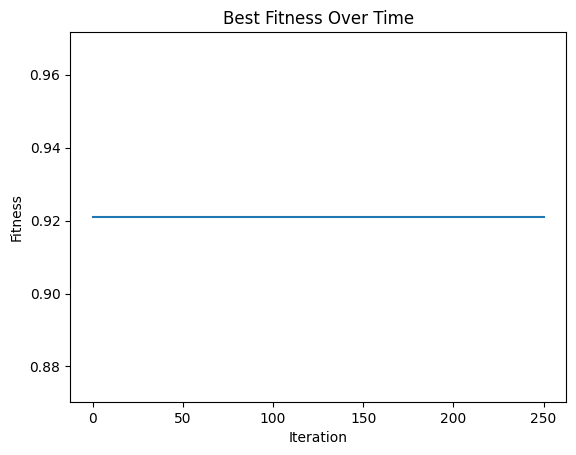

In [21]:
## Do it until reach the maximum iterations
for iteration in range(max_iterations):

    # Generate a neighboring solution with mutation (gene flipping)
    new_solution = current_solution.copy()

    ## Calculate the probability of mutation for each gene and modify it if the random
    ## number generated is lower than the mutation_rate.
    ## This one could flip more than one gene, althought is more likely to not change 
    ## any gen due to the low probability
    for gene_no in range(len(new_solution)):
        if np.random.rand() < mutation_rate:
            if gene_no == 0 and np.random.rand() < kernel_mutation_prob:
                new_solution[gene_no] = random.choice(kernel)
            elif gene_no == 1:
                new_solution[gene_no] = random.choice(C)
            elif gene_no == 2:
                new_solution[gene_no] = random.choice(degree)
            elif gene_no == 3 and np.random.rand() < kernel_mutation_prob:
                new_solution[gene_no] = random.choice(gamma)
            elif gene_no == 4:
                new_solution[gene_no] = random.choice(coef0)

    ## Calculate the fitness for the new solution
    new_fitness = get_svm_fitness(my_kernel = new_solution[0], my_C = new_solution[1], my_degree = new_solution[2], my_gamma = new_solution[3], my_coef0 = new_solution[4])
    print(f"new_fitness: {new_fitness}")

    ## Calculate the change in the fitness, use to know whether to accepted or not later
    change_in_fitness = new_fitness - current_fitness
    print(f"change_in_fitness: {change_in_fitness}")

    ## Check if new solution should be accepted, if not accepted just go to the next iteration
    ## and ignore the new fitness
    if accept_solution(change_in_fitness, temperature):
        current_solution = new_solution.copy()
        current_fitness = new_fitness.copy()
    
    print(f"Current solution: {current_solution}")

    ## Add the new fitness to fitness_over_time to plot the changes in fitness later
    fitness_over_time.append(current_fitness.copy())
    print(f"fitness_over_time: {fitness_over_time}")
    
    ## Cool down
    temperature *= cooling_rate
    temps.append(temperature)
    print(f"temps: {temps}")

    print(f"iteration: {iteration}")

    print("------------------------------------------------------")

##Print the final solution
print(f"Best solution: {current_solution}")

plt.plot(fitness_over_time)
plt.title("Best Fitness Over Time")
plt.xlabel("Iteration")
plt.ylabel("Fitness")
plt.show()

In [22]:
## Test some solutions

# my_test = get_svm_fitness(my_kernel = 'poly', my_C = 10.5, my_degree = 9, my_gamma = 'scale', my_coef0 = 0.05)
# my_test